# Customer Propensity Modeling Project


##  Primary Objectives

We are trying to help a marketing executive understand which characteristics of a potential customer are best predictors of the propensity of potential customers to purchase one of the bank's products (in this example a term deposit). Besides a predictive model that would help target customers likely to buy the product, we want to be able to gain additional insight into the data through exploratory analysis, visualizations and feature assesments of important features and make suggestions to management based on this.

To summarize, we have been tasked with:
1. Marketing recommendations based on exploratory data analysis
2. Using a variety of data science techniques to implement predictive analytics on data
3. Technical Documentation for the methodology selected in the project that include diagrams of the ML pipeline and technical considerations made at each step of the pipeline. I will also include discussion of how we could deploy the selected model in a production environment

## Data Sources and General Description

We obtained data from the UCL repository (http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The dataset purports to record a direct marketing campaign of a Portuguese banking institution. It has 21 attributes, and 41188 instances with a binary label "y", delineated by a "yes" or "no", that describes if the individual had chosen to purchase the bank's product or not. The client data features are described below:

Client information:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown') related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')




## Process flow

After importing the anticipated modules and libraries for this project, we will start with an arbitrary Exploratory Data Analysis that includes visualizations and written summaries, followed by a preprocessing and feature engineering process that takes into account findings from the analyses. We plan to fit a variety of machine learning models (Linear, Neighbors, and Ensemble) in multiple cases, as well as a Neural Network and then compare our results before a finalized recommendation.





In [1]:
# Importing Libraries

# Data Manipulation and math
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Options
import warnings
warnings.filterwarnings('ignore')


# Deep learning Modules 
import tensorflow as tf
from keras.datasets import cifar10  #load data
from tensorflow.python.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.python.keras import Sequential
from tensorflow.keras.optimizers import Adam


# Scikitlearn Modules for regular classification

from  sklearn.ensemble import RandomForestClassifier
from  sklearn.tree import DecisionTreeClassifier
from  sklearn.neighbors import KNeighborsClassifier 
from  sklearn.linear_model import LogisticRegression
from  sklearn.linear_model import SGDClassifier

# Scikitlearn modules for traintest split and metrics
from  sklearn.model_selection import train_test_split
from  sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Scikitlearn module for label encoding
from sklearn.preprocessing import LabelEncoder



# Exploratory Data Analysis

In [2]:

# Import raw data from local source
df_bank_raw = pd.read_csv('./data/bank-additional-full.csv', delimiter = ';')

df_bank_raw.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [3]:
df_bank_raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
df_bank_raw.shape

(41188, 21)

# Initial Observations

There is a combination of categorical and numeric data. 

Based on description it looks like there is little to no missing data (null/unusable) so imputations are likely not required. We can do a further check for missing data. Results appear clean.

In [5]:
# Checking for missing data

total = df_bank_raw.isnull().sum().sort_values(ascending=False)

percent = (df_bank_raw.isnull().sum()/df_bank_raw.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)




                Total  Percent
y                   0      0.0
day_of_week         0      0.0
job                 0      0.0
marital             0      0.0
education           0      0.0
default             0      0.0
housing             0      0.0
loan                0      0.0
contact             0      0.0
month               0      0.0
duration            0      0.0
nr.employed         0      0.0
campaign            0      0.0
pdays               0      0.0
previous            0      0.0
poutcome            0      0.0
emp.var.rate        0      0.0
cons.price.idx      0      0.0
cons.conf.idx       0      0.0
euribor3m           0      0.0
age                 0      0.0


In [6]:
# Replace the yes/no strings in the outcome label to a binary 1 and 0

df_bank = df_bank_raw.copy()


df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Visualizations

We will start with visualizing numerical features. We will do histograms of all numeric data to get an idea of data spreads of continuous variable features.

In [7]:
# Separating the numeric columns

numeric_col = df_bank.select_dtypes(include=np.number).columns.tolist() 

print("Numeric Features:")
print(df_bank[numeric_col].head())



Numeric Features:
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  
0          -36.4      4.857       5191.0  
1          -36.4      4.857       5191.0  
2          -36.4      4.857       5191.0  
3          -36.4      4.857       5191.0  
4          -36.4      4.857       5191.0  


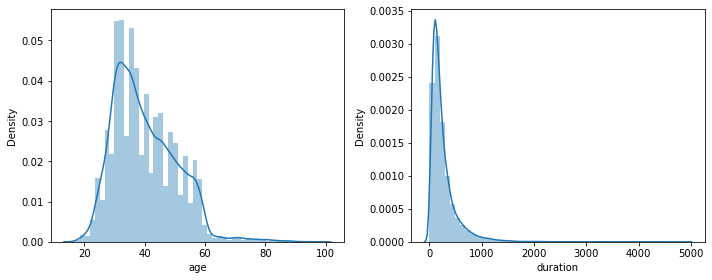

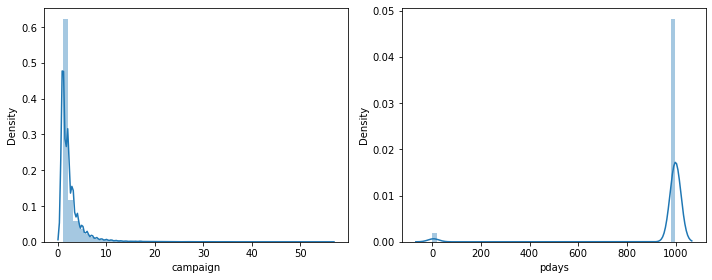

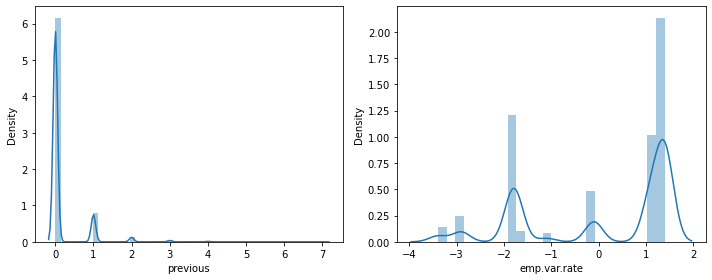

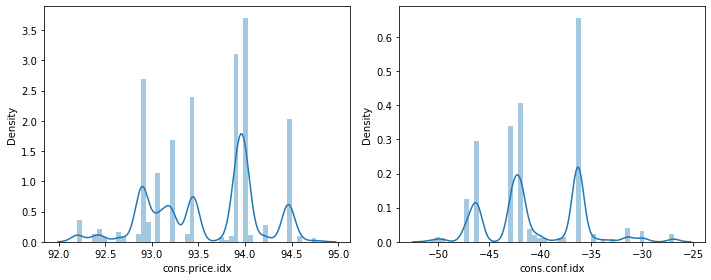

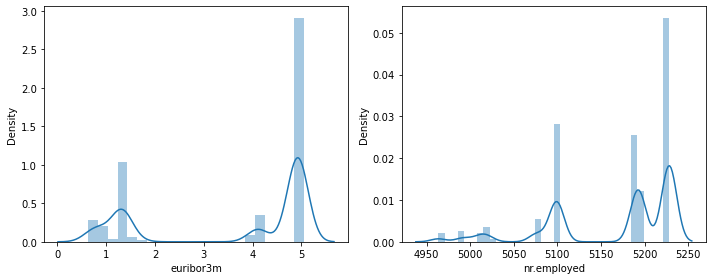

In [8]:
# Code to plot histograms

numeric_columns = df_bank.select_dtypes(include=['number']).columns.tolist()


# Use iteratives to put all features within histogram subplots to see distribution of continuous features
    
for i in range(0,len(numeric_columns),2):
    if len(numeric_columns) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(df_bank[numeric_columns[i]])
        plt.subplot(122)            
        sns.distplot(df_bank[numeric_columns[i+1]])
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(df_bank[numeric_columns[i]])


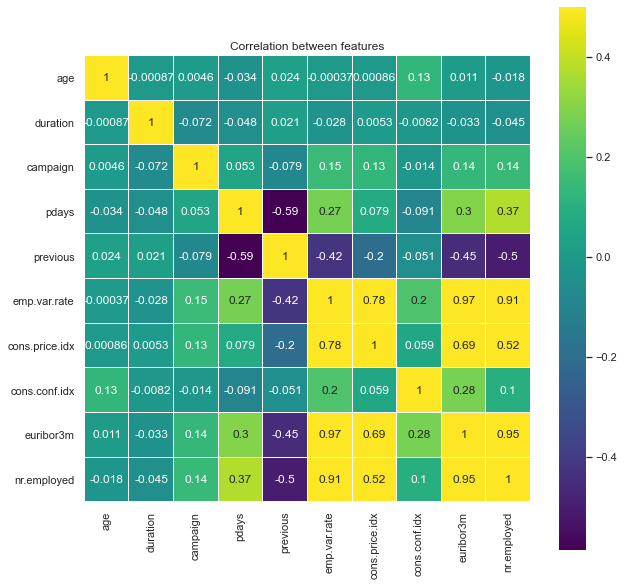

In [9]:
# check for linear dependence between features

corrMatrix = df_bank.corr()

sns.set(font_scale=1)
plt.figure(figsize=(10,10))

sns.heatmap(corrMatrix, vmax=.5, linewidths=0.01,
            square=True,annot=True,cmap='viridis')
plt.title('Correlation between features');

In [10]:
# Visualizing categorical variables


# Identify categorical columns


categorical_col = df_bank.select_dtypes(exclude=np.number).columns.tolist() # we will exclude data with numeric features
                                                                              # we will store the categorical features in a variable


print("Categorical Features:")
print(df_bank[categorical_col].head())





Categorical Features:
         job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome   y  
0         mon  nonexistent  no  
1         mon  nonexistent  no  
2         mon  nonexistent  no  
3         mon  nonexistent  no  
4         mon  nonexistent  no  


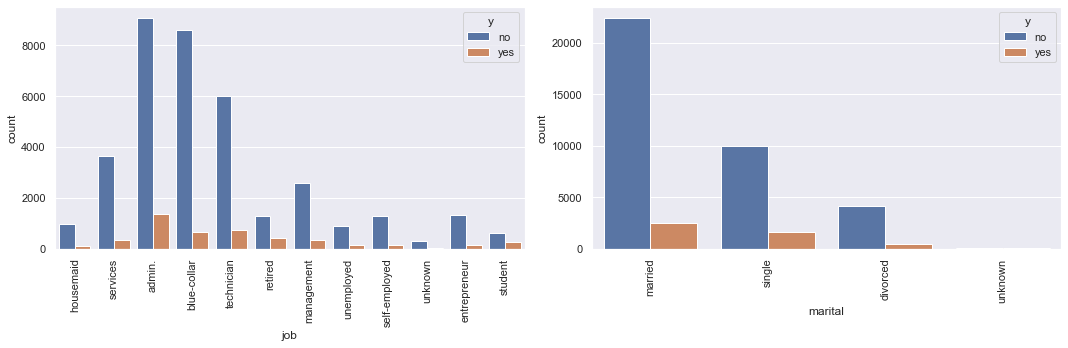

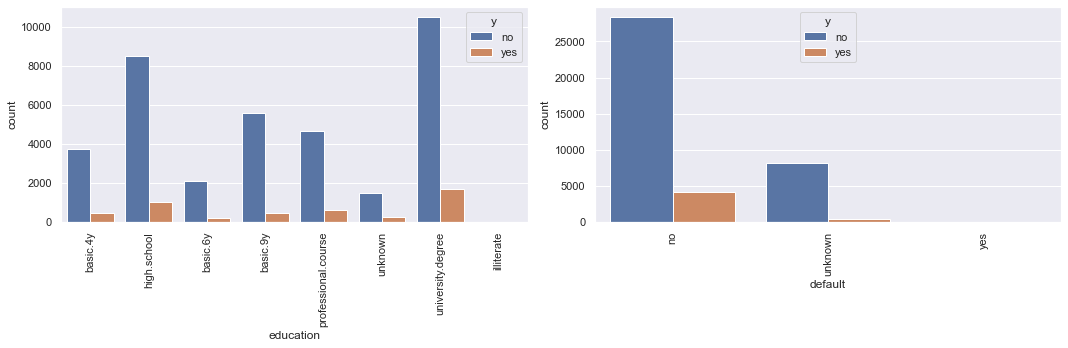

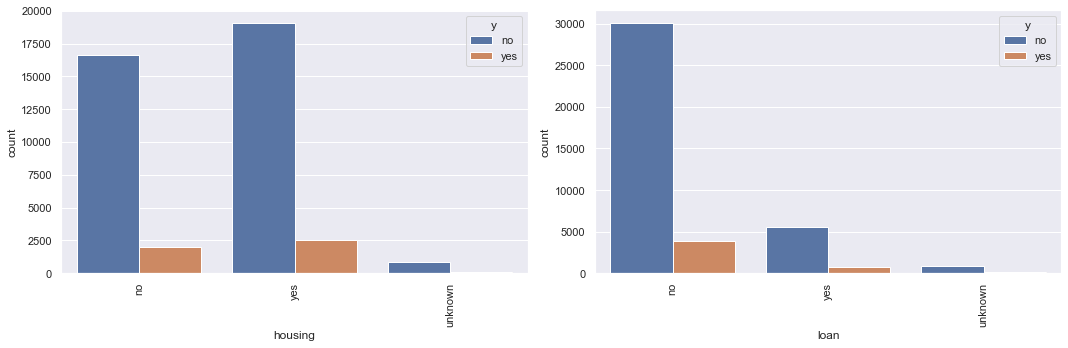

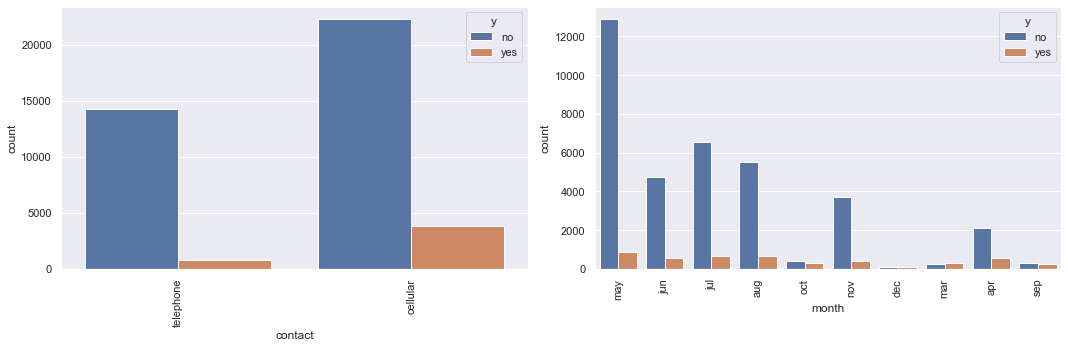

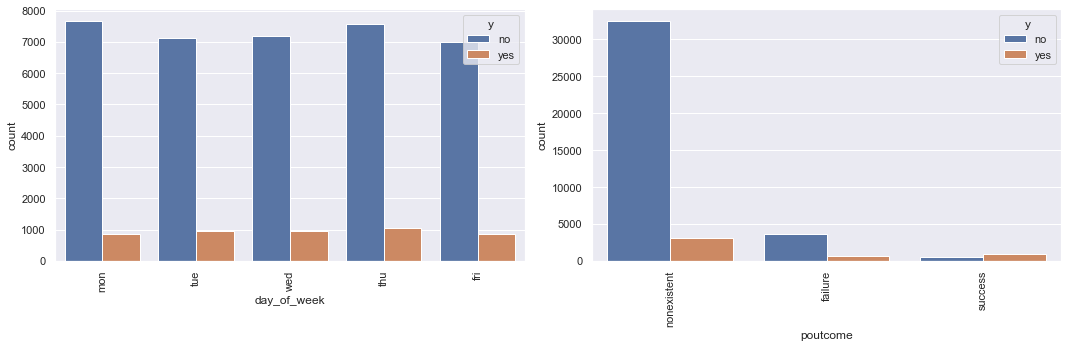

In [11]:
# Use iterative for bar subplots to visualize data

categorical_columns = df_bank.select_dtypes(exclude=np.number).columns
for i in range(0,len(categorical_columns),2):
    if len(categorical_columns) > i+1:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        sns.countplot(x=df_bank[categorical_columns[i]],hue=df_bank['y'],data=df_bank)
        plt.xticks(rotation=90)
        plt.subplot(122)            
        sns.countplot(df_bank[categorical_columns[i+1]],hue=df_bank['y'],data=df_bank)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
        
        

Based on looking at the bar plots which map out the results, there is a clear imbalance between the binary outcomes we are trying to classify. We need to visualize the ratio of yes and nos

Text(0.5, 1.0, 'Percentage of Labels, y')

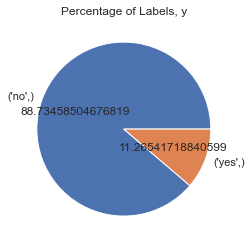

In [12]:
# Class imbalance

purchase_count = df_bank_raw.value_counts('y')

percentage_yes = purchase_count[1]/(purchase_count[0]+purchase_count[1])

plt.pie(purchase_count,labels=purchase_count.index, autopct=str)
plt.title('Percentage of Labels, y')

There is significant, but understandable, discrepancy between the outcomes we are trying to classify. 88.7% of the outcomes from the marketing campaign suggest a no answer, an 8:1 ratio against yeses. We may need to take this account for the training process, possibly looking into SMOTE as part of the preprocessing pipeline.

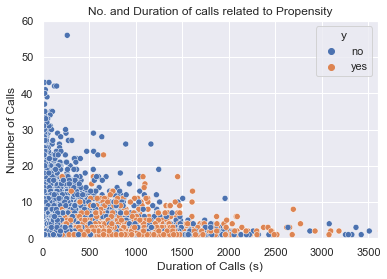

In [13]:
# Also noticed some interesting connections about the number of calls, as well as the duration

duration_campaign = sns.scatterplot(x='duration', y='campaign',data = df_bank,
                     hue = 'y')

plt.axis([0,3600,0,60])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (s)')
plt.title('No. and Duration of calls related to Propensity')
plt.show()

#Interpretation in summary

## Summary

Summarizing our EDA, we get:
- There is an imbalance between the classes, with majority (88%) saying no. During preprocessing we can look into balancing classes using SMOTE to assist training and fitting process.
-  The Empvarrate (employment variation rate indicator) feature has a very high linear dependent relation with Euribor3m indicator feature (0.97). We can take this variable out of our training models.
- As expected calls under a certain duration (2-3 minutes) tend to almost certainly result in a no to purchasing. Something interesting is that there is also has a relation to the number of calls made to the customer. As number of calls increase we see the law of diminishing returns apply, as customers who get repeated calls tend to turn away from wanting to buy the product. A lot of time/money could be saved by not making repeated calls to customers who tend to end the phone calls before 3 minutes, and a limitation could be made to the number of calls made to the customer.

Some other observations we got on the demographics of who buy the product:
- There are statistically significant higher rates of success with contacting cellular phones than landlines.
- Divorced individuals tend to have a lower chance of buying the product
- Peope who have previously said yes tend to purchase the product

# Data Preprocessing


We need to do a couple of things for the preprocessing pipeline, proceeding from our data explorations:
- Drop the Empvarrate column due to the heavy correlation with Euribor3m feature
- A resampling of the outcome frequencies to get a balanced classification in training (synthetic minority over-sampling, SMOTE)

In [14]:
df_bank['y'] = df_bank['y'].replace({'no':0,'yes':1})


# drop empvarrate
df_bank_proc= pd.DataFrame
df_bank_proc=df_bank.copy()
df_bank_proc.drop(['emp.var.rate'], axis=1, inplace=True)

# drop duration
df_bank_proc= pd.DataFrame
df_bank_proc = df_bank.copy()
df_bank_proc.drop(['duration'], axis=1, inplace=True)

df_bank_proc.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# Running the Training Algorithms

We will use 4 different training models on each set of data, for a total of 8 initial training models, and compare the ROC/AUC curves:
- A Linear classifier, Logistic Regression
- A Neighbors classifier, KNeighbors
- A Tree Classifier, DecisionTree
- An Ensemble Classifier, Random Forest

We have enough samples available to run also run an artificial neural network, and see if we can get even better accuracies 

In [49]:
#Separating into numeric Features
import importlib
import predictplot

df_bank_numericonly= df_bank_proc.select_dtypes(include=['number']).iloc[:,:]
X_df_bank_numericonly= df_bank_numericonly.iloc[:,:-1].values
Y_df_bank_numericonly = df_bank_numericonly.iloc[:,-1]


Y_df_bank = df_bank.iloc[:,-1]
from imblearn.over_sampling import SMOTE

x_trainsmote,x_val,y_trainsmote,y_val = train_test_split(df_bank_proc2, df_bank_proc2.iloc[:,-1], test_size=0.5, random_state=42)
    
# Applying Smote on train data for dealing with class imbalance

smote = SMOTE()

X_smfull, y_sm =  smote.fit_resample(x_trainsmote, y_trainsmote)

X_sm = X_smfull.iloc[:,:-1]


# Train test split regular

X_train, X_test, y_train, y_test = train_test_split(X_df_bank_numericonly, Y_df_bank_numericonly, test_size=0.5, random_state=100)
X_train.shape

# gathering random samples for testing later on, without SMOTE balancing

# Balancing the classifiers with SMOTE

df_bank_proc2 = df_bank_numericonly.copy()

# Now to preprocess data that include numeric and categoric data

X_df_numericandcategoric = df_bank_proc.iloc[:,:-1]
X_df_numericandcategoric

# Applying One Hot Encoding

from sklearn.preprocessing import OneHotEncoder

cat_columns = ['job','marital','education','default','housing','loan','contact', 'poutcome', 'day_of_week', 'month']
encodeddata = X_df_numericandcategoric[cat_columns]
enc = OneHotEncoder()
enc = enc.fit(encodeddata)
enc_labels = enc.transform(encodeddata).toarray()

new_columns=list()
for col, values in zip(encodeddata.columns, enc.categories_):
    new_columns.extend([col + '_' + str(value) for value in values])

X_df_numericandcategoric_encoded= pd.concat([X_df_numericandcategoric, pd.DataFrame(enc_labels, columns=new_columns)], axis='columns')
X_df_numericandcategoric_encoded = X_df_numericandcategoric_encoded.drop(cat_columns, axis=1)


Y_df_bank = df_bank_proc2.iloc[:,-1]

# Train test split regular
# This is again to harvest test samples
X_train, X_test, y_train, y_test = train_test_split(X_df_numericandcategoric_encoded, Y_df_bank, test_size=0.5, random_state=100)

XYdfbankproc = pd.concat([X_df_numericandcategoric_encoded, Y_df_bank], axis='columns')


# Balancing the classifiers with SMOTE

XYdfbankproc2 = XYdfbankproc.copy()

x_trainsmote,x_val,y_trainsmote,y_val = train_test_split(XYdfbankproc2, XYdfbankproc2.iloc[:,-1], test_size=0.5, random_state=42)
    
# Applying Smote on train data for dealing with class imbalance

smote = SMOTE()

X_smfull, y_sm =  smote.fit_resample(x_trainsmote, y_trainsmote)

X_sm = X_smfull.iloc[:,:-1]

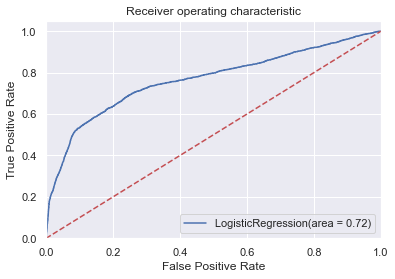

              precision    recall  f1-score   support

           0       0.95      0.75      0.84     18244
           1       0.26      0.69      0.38      2350

    accuracy                           0.75     20594
   macro avg       0.61      0.72      0.61     20594
weighted avg       0.87      0.75      0.79     20594



In [53]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logregcat = LogisticRegression()
logregcat.fit(X_sm, y_sm)

predictplot.predictplot(logregcat, X_test,y_test)



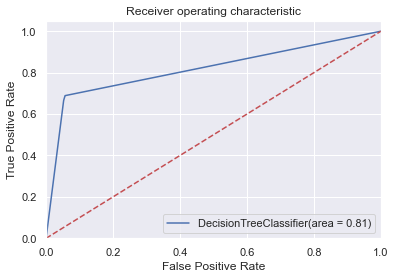

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     18244
           1       0.62      0.67      0.64      2350

    accuracy                           0.92     20594
   macro avg       0.79      0.81      0.80     20594
weighted avg       0.92      0.92      0.92     20594



In [51]:
from sklearn.tree import DecisionTreeClassifier
dtccat = DecisionTreeClassifier()
dtccat.fit(X_sm, y_sm)

predictplot.predictplot(dtccat, X_test,y_test)


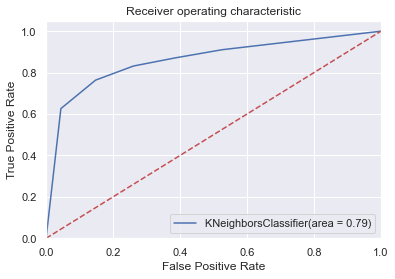

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     18244
           1       0.29      0.83      0.43      2350

    accuracy                           0.75     20594
   macro avg       0.63      0.79      0.64     20594
weighted avg       0.89      0.75      0.79     20594



In [52]:
from sklearn.neighbors import KNeighborsClassifier  
KNNcat = KNeighborsClassifier()
KNNcat.fit(X_sm, y_sm)

predictplot.predictplot(KNNcat, X_test,y_test)

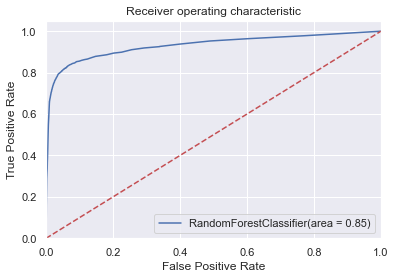

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18244
           1       0.84      0.72      0.78      2350

    accuracy                           0.95     20594
   macro avg       0.90      0.85      0.87     20594
weighted avg       0.95      0.95      0.95     20594



In [24]:
from sklearn.ensemble import RandomForestClassifier 
rfccat = RandomForestClassifier()
rfccat.fit(X_sm, y_sm)

predictplot.predictplot(rfccat, X_test,y_test)

## Running an Artificial Neural Network

To compare the results of the classifier models used to a neural I designed a 3 layer Neural Network with the help of TensorFlow on processed data without SMOTE. I used 70 units on the first 2 layers to roughly match the features being utilized, with a sigmoid activation function within each neuron. The final layer gives a propensity between 0 and 1, and I will test out the results by classifying a propensity above 0.5 as being a yes, and under 0.5 as being a no. Because of the presence of under 50,000 samples, I anticipate this being a relatively quick and efficient training process for ad hoc analysis

In [32]:

# Running an artificial Neural Network


from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_df_numericandcategoric_encoded, Y_df_bank, test_size=.3,random_state=0)


# Utilize standard scaler to preprocess
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

annn = tf.keras.models.Sequential()

annn.add(tf.keras.layers.Dense(units=20,activation="sigmoid"))

annn.add(tf.keras.layers.Dense(units=20,activation="sigmoid"))

annn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

annn.compile(optimizer='adam', loss = 'binary_crossentropy' , metrics =['accuracy'] )


annn.fit(xtrain, ytrain,batch_size=32 , epochs=20)

Epoch 1/20
901/901 [==============================] - 1s 587us/step - loss: 0.3343 - accuracy: 0.8886
Epoch 2/20
901/901 [==============================] - 1s 575us/step - loss: 0.2755 - accuracy: 0.9001
Epoch 3/20
901/901 [==============================] - 1s 575us/step - loss: 0.2758 - accuracy: 0.8993
Epoch 4/20
901/901 [==============================] - 1s 559us/step - loss: 0.2792 - accuracy: 0.9000
Epoch 5/20
901/901 [==============================] - 1s 569us/step - loss: 0.2759 - accuracy: 0.9001
Epoch 6/20
901/901 [==============================] - 1s 566us/step - loss: 0.2731 - accuracy: 0.9026
Epoch 7/20
901/901 [==============================] - 1s 567us/step - loss: 0.2642 - accuracy: 0.9054
Epoch 8/20
901/901 [==============================] - 1s 606us/step - loss: 0.2772 - accuracy: 0.9001
Epoch 9/20
901/901 [==============================] - 1s 616us/step - loss: 0.2811 - accuracy: 0.8972
Epoch 10/20
901/901 [==============================] - 1s 577us/step - loss: 0.273

The resulting neural network basically seems to converge at roughly 0.92 accuracy around 10 epochs without being demanding on the GPU. We can test this out.


In [54]:

#Testing out the network

ypred = annn.predict(xtest)

ypred = np.where(ypred>.5,1,0)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

acc = accuracy_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
fs = f1_score(ytest, ypred)

print("Test Accuracy: " , acc)
print("Confusion Matrix:" , cm)
print(fs)

Test Accuracy:  0.8986809096058914
Confusion Matrix: [[10699   270]
 [  982   406]]
0.3934108527131783


# Feature Importance

We can use Recursive Feature Elimination (RFE) to see the impacts of most important features, ranked, on the best classifier model we tested out, an ensemble Random Forest Classifier using the numerical and categorical data.


In [ ]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination on rfccat, the Random Forest Classifier on 
rfe = RFE(rfccat, 5) 


model_select = rfe.fit(X_sm, y_sm)


feature_ranking = pd.Series(rfe.ranking_, index=X_sm.columns)
print(feature_ranking[feature_ranking.values==1].index.tolist())


In [ ]:
#Using the feature importances from the randomforestclassifier
rfccat_imp = pd.Series(rfccat.feature_importances_, index=X_test.columns).sort_values(ascending=False).head(10)

# plotting bar chart according to feature importance
rfccat_imp.plot(kind='bar')
plt.title('Importance of 10 most significant features')

print(rfccat_imp)

# Summary of Results

Based on all our tests Model 8 (randomforest classifier model) has been the best in being able to predict the outcomes, having been trained with both the numeric and categorical data, and SMOTE applied. If we look at feature contributions to driving purchasing behavior, we can see that a lot of the most significant features are numeric.
The Deep learning neural network, used as benchmark, did not perform as well, likely due to the quantity of data.